### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MO, WeekdayLocator

-----------

### Load data

In [2]:
df= pd.read_csv("data/ibes_surpsumu.csv")
print(df.shape)
df.head()

(34484, 8)


,ticker,oftic,pyear,pmon,anndats,pqtr,pyq,pym
0,000V,EIGR,2019,12,2020-03-13,4,2019Q4,2019_12
1,000V,EIGR,2020,3,2020-05-07,1,2020Q1,2020_03
2,000V,EIGR,2020,6,2020-08-06,2,2020Q2,2020_06
3,000V,EIGR,2020,9,2020-11-05,3,2020Q3,2020_09
4,000V,EIGR,2020,12,2021-03-09,4,2020Q4,2020_12


In [3]:
df.dtypes

ticker     object
oftic      object
pyear       int64
pmon        int64
anndats    object
pqtr        int64
pyq        object
pym        object
dtype: object

-----------

### Reshape data

In [4]:
count= df.groupby(['anndats']).size().to_frame('count').reset_index().sort_index()
count.head(7)

,anndats,count
0,2020-01-01,2
1,2020-01-02,14
2,2020-01-03,1
3,2020-01-06,3
4,2020-01-07,4
5,2020-01-08,15
6,2020-01-09,15


### Cleanse data

In [5]:
datetime_series = pd.to_datetime(count['anndats']).dt.date
datetime_index  = pd.DatetimeIndex(datetime_series.values)
count.set_index(datetime_index, inplace=True)
count.index= count.index.date
count.head(7)

,anndats,count
2020-01-01,2020-01-01,2
2020-01-02,2020-01-02,14
2020-01-03,2020-01-03,1
2020-01-06,2020-01-06,3
2020-01-07,2020-01-07,4
2020-01-08,2020-01-08,15
2020-01-09,2020-01-09,15


In [6]:
count.sort_index(inplace=True)
count=count.asfreq('D')
count['anndats']= count.index
count.head(7)

,anndats,count
2020-01-01,2020-01-01,2.0
2020-01-02,2020-01-02,14.0
2020-01-03,2020-01-03,1.0
2020-01-04,2020-01-04,NaN
2020-01-05,2020-01-05,NaN
2020-01-06,2020-01-06,3.0
2020-01-07,2020-01-07,4.0


In [7]:
count['year']= pd.to_datetime(count.anndats).dt.year
count['month']= pd.to_datetime(count.anndats).dt.month
count['qtr']= pd.to_datetime(count.anndats).dt.quarter
count.head(7)

,anndats,count,year,month,qtr
2020-01-01,2020-01-01,2.0,2020,1,1
2020-01-02,2020-01-02,14.0,2020,1,1
2020-01-03,2020-01-03,1.0,2020,1,1
2020-01-04,2020-01-04,NaN,2020,1,1
2020-01-05,2020-01-05,NaN,2020,1,1
2020-01-06,2020-01-06,3.0,2020,1,1
2020-01-07,2020-01-07,4.0,2020,1,1


In [9]:
count.index= count.index.date

--------------
## Visualizations

In [10]:
max_count= count['count'].max()

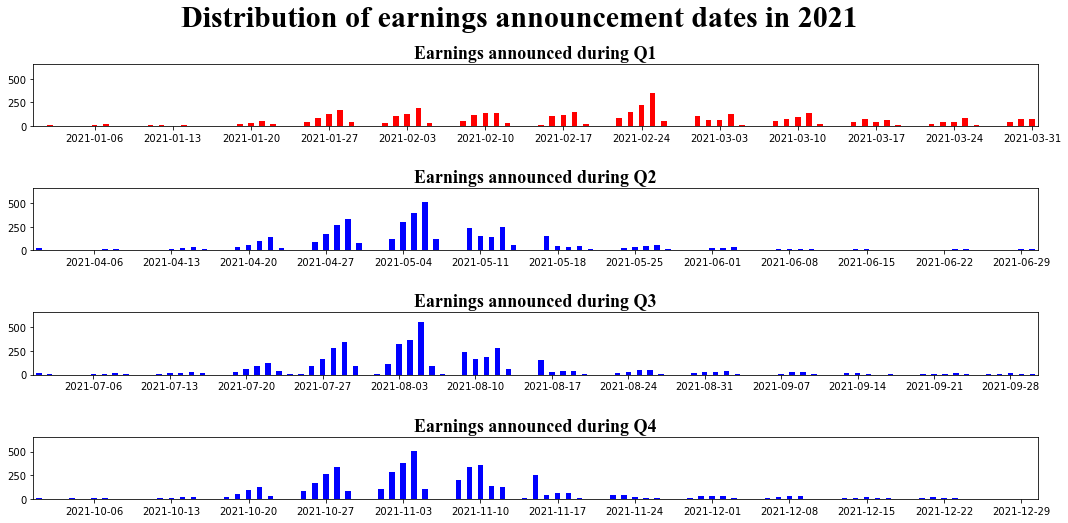

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(18, 8))
fig.suptitle('Distribution of earnings announcement dates in 2021', fontsize=30, fontname='Times New Roman', weight='bold')

for idq, q in enumerate([1,2,3,4]):
    ax= axes[idq]
    
    if q==1:
        count[(count.year==2021) &(count.qtr==q)].plot(ax= ax, kind='bar', y='count', legend=False, ylim=(0,max_count+50), color='r')
    else:
        
        count[(count.year==2021) &(count.qtr==q)].plot(ax= ax, kind='bar', y='count', legend=False, ylim=(0,max_count+50), color='b')
    loc = WeekdayLocator(interval=1)
    ax.xaxis.set_major_locator(loc)
    ax.tick_params(labelrotation=0)
    ax.set_title(f"Earnings announced during Q{q}", fontsize=18, fontname='Times New Roman', weight='bold')
plt.subplots_adjust(hspace=1)
plt.show()

<em> More dispersed during Q1 perhaps due to audits </em>

### Save figure

In [18]:
fig.savefig('../assets/images/earnings-ann-date-dist.jpg')

----------